In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.random.seed(12345)
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
plt.rcParams["font.family"] = 'Malgun Gothic'

# 7장 데이터 정제 및 준비(Data Cleaning and Preparation)

## 7.1 누락된 데이터 처리하기
* np.nan
* None
* isna() : 결측치에 대해 True 값으로 반환
* dropna() : 결측치 제거하기
* fillna() :결측값을 다른 값으로 채우는 데 사용

In [93]:
# ex : 다음 주어진 결측치을 담고 있는 데이터프레임에 대해 정제 작업하기
df = pd.DataFrame(np.random.standard_normal((7, 3)))
print(df)

# 결측치 추가
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
print(df)

# 1. 결측치 확인 및 처리
print(df.isna())

filtered = df.dropna() # 적어도 한 개 이상 결측치를 갖고 있는 행을 삭제
print(filtered)

# 2. 색인 재설정
filtered.reset_index(drop=True)

# 3. 결측치를 각 열의 평균값으로 채우기 - 평균값, 중앙값(df.median())
df.fillna(df.mean())


          0         1         2
0  0.503299 -0.543186 -0.506678
1  0.729653  0.434273 -1.133674
2  1.423953  0.266352 -0.854264
3 -0.550597 -0.619110  1.038933
4 -0.910611  0.529953 -0.008471
5 -1.129038  0.569854 -0.863392
6 -1.356144 -0.057152 -0.108621
          0         1         2
0  0.503299       NaN       NaN
1  0.729653       NaN       NaN
2  1.423953       NaN -0.854264
3 -0.550597       NaN  1.038933
4 -0.910611  0.529953 -0.008471
5 -1.129038  0.569854 -0.863392
6 -1.356144 -0.057152 -0.108621
       0      1      2
0  False   True   True
1  False   True   True
2  False   True  False
3  False   True  False
4  False  False  False
5  False  False  False
6  False  False  False
          0         1         2
4 -0.910611  0.529953 -0.008471
5 -1.129038  0.569854 -0.863392
6 -1.356144 -0.057152 -0.108621


,0,1,2
0,0.503299,0.347552,-0.159163
1,0.729653,0.347552,-0.159163
2,1.423953,0.347552,-0.854264
3,-0.550597,0.347552,1.038933
4,-0.910611,0.529953,-0.008471
5,-1.129038,0.569854,-0.863392
6,-1.356144,-0.057152,-0.108621


## 7.2 Transformation
* duplicated()
  * 데이터프레임의 중복된 행 또는 값은 True로 표시되고, 중복되지 않은 행 또는 값은 False로 표시
* drop_duplicates()
  * DataFrame 또는 Series의 모든 열을 고려하여 중복된 행 또는 값을 제거
    * subset: 중복된 행 또는 값을 제거하는 데 사용할 열의 리스트
    * keep: 다음 값 중 하나
    * first: 첫 번째 중복된 행 또는 값을 유지
    * last: 마지막 중복된 행 또는 값을 유지
    * False: 모든 중복된 행 또는 값을 제거
    * inplace: DataFrame을 변경할지 여부를 표시

In [92]:
# ex 데이터프레임의 중복 데이터 제거하기 
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 5, 5]})
print(data)

# 1. 중복된 데이터 확인
print(data.duplicated())

# 2. 중복된 행 제거하기
print(data.drop_duplicates(keep="first"))

# 3. "K1" 열을 기준으로 중복된 행을 필터링하기
print(data.drop_duplicates(subset=['k1'], keep="last"))


    k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   5
6  two   5
0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool
    k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   5
    k1  k2
4  one   3
6  two   5


## 문제: 주어진 데이터셋를 정제하고 준비하여 다음 분석을 수행하시오.
* 데이터셋 :
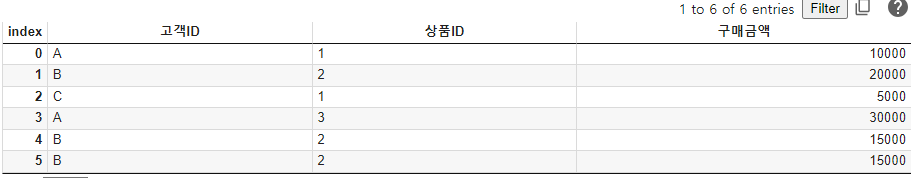
* 고객별 구매 금액 합계
* 상품별 구매 금액 합계
* 고객별로 가장 많이 구매한 상품

In [94]:
# 데이터셋
data = [{"customer_id": "A", "product_id": "1", "amount": 10000}, 
        {"customer_id": "B", "product_id": "2", "amount": 20000}, 
        {"customer_id": "C", "product_id": "1", "amount": 5000}, 
        {"customer_id": "A", "product_id": "3", "amount": 30000}, 
        {"customer_id": "B", "product_id": "2", "amount": 15000}, 
        {"customer_id": "B", "product_id": "2", "amount": 15000}]


In [96]:
# 1. 데이터프레임 탐색
# 1) 데이터셋을 데이터프레임으로 변환하기
df = pd.DataFrame(data)
print(df)

# 2) 데이터프레임을 첫 행부터 3번째 행까지 슬라이싱하기
print(df.head(3))

# 3)데이터프레임의 열 이름을 변경하기
df.rename(columns = {"customer_id" : "고객ID", "product_id" : "상품ID", "amount" : "구매금액"}, inplace= True)
print(df)


  customer_id product_id  amount
0           A          1   10000
1           B          2   20000
2           C          1    5000
3           A          3   30000
4           B          2   15000
5           B          2   15000
  customer_id product_id  amount
0           A          1   10000
1           B          2   20000
2           C          1    5000
  고객ID 상품ID   구매금액
0    A    1  10000
1    B    2  20000
2    C    1   5000
3    A    3  30000
4    B    2  15000
5    B    2  15000


In [97]:
# 2. 데이터프레임 정제하기
# 1) 결측치 데이터 확인하기
print(df.isna())

# 2) 중복 데이터 확인하기
print(df.duplicated())

# 3) 중복 데이터 제거
print(df.drop_duplicates())


    고객ID   상품ID   구매금액
0  False  False  False
1  False  False  False
2  False  False  False
3  False  False  False
4  False  False  False
5  False  False  False
0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool
  고객ID 상품ID   구매금액
0    A    1  10000
1    B    2  20000
2    C    1   5000
3    A    3  30000
4    B    2  15000


In [98]:
# 3. 데이터프레임 정렬하기
# 1) 고객ID 와 상품ID을 기준으로 내림차순으로 정렬하기
df = df.sort_values(by=['고객ID','상품ID'], ascending= False)
print(df)

# 2) 데이터프레임의 기존의 인덱스을 색인 재설정하기
df = df.reset_index(drop=True)
print(df)


  고객ID 상품ID   구매금액
2    C    1   5000
1    B    2  20000
4    B    2  15000
5    B    2  15000
3    A    3  30000
0    A    1  10000
  고객ID 상품ID   구매금액
0    C    1   5000
1    B    2  20000
2    B    2  15000
3    B    2  15000
4    A    3  30000
5    A    1  10000


In [99]:
# 4. 데이터분석하기
# 1) 고객별 구매 금액 합계를 계산 (hint: groupby())
total_spent_by_customer = df.groupby("고객ID")["구매금액"].sum()
print(total_spent_by_customer)

# 2) 상위 최우수 고객 1명 추출하기
result = total_spent_by_customer.sort_values(ascending = False)
print(result.head(1))


고객ID
A    40000
B    50000
C     5000
Name: 구매금액, dtype: int64
고객ID
B    50000
Name: 구매금액, dtype: int64


In [100]:
# 3) 상품별 구매 금액 합계를 계산
total_spent_by_product = df.groupby("상품ID")["구매금액"].sum()
print(total_spent_by_product)


상품ID
1    15000
2    50000
3    30000
Name: 구매금액, dtype: int64


In [108]:
# 4) 고객에서 가장 인기있는 상품 찾기
product_counts = df["상품ID"].value_counts()
print(product_counts)

# (1)
print(product_counts.idxmax())

# (2)
product_counts[product_counts == product_counts.max()].idxmax()


상품ID
2    3
1    2
3    1
Name: count, dtype: int64
2


'2'

고객ID
A    20000.000000
B    16666.666667
C     5000.000000
Name: 구매금액, dtype: float64


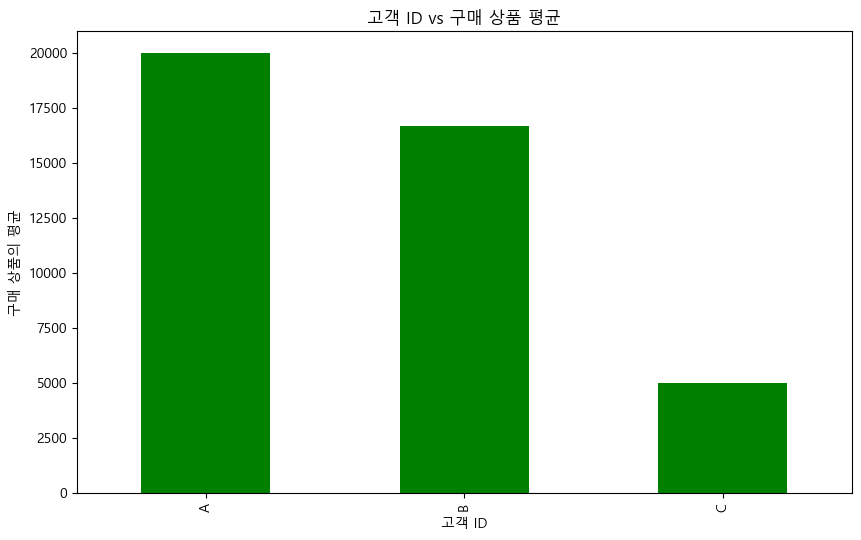

In [115]:
# 5) 고객ID별 구매금액의 평균를 계산하고 막대그래프로 시각화 (hint : groupby)
# (1)
grouped_mean = df.groupby("고객ID")["구매금액"].mean()
print(grouped_mean)

# (2)
grouped_mean.plot(kind = "bar", color = "green") # (= grouped_mean.plot.bar(color = "green"))

plt.xlabel("고객 ID")
plt.ylabel("구매 상품의 평균")
plt.title("고객 ID vs 구매 상품 평균")
plt.show()


고객ID  상품ID
A     1       10000
      3       30000
B     2       50000
C     1        5000
Name: 구매금액, dtype: int64


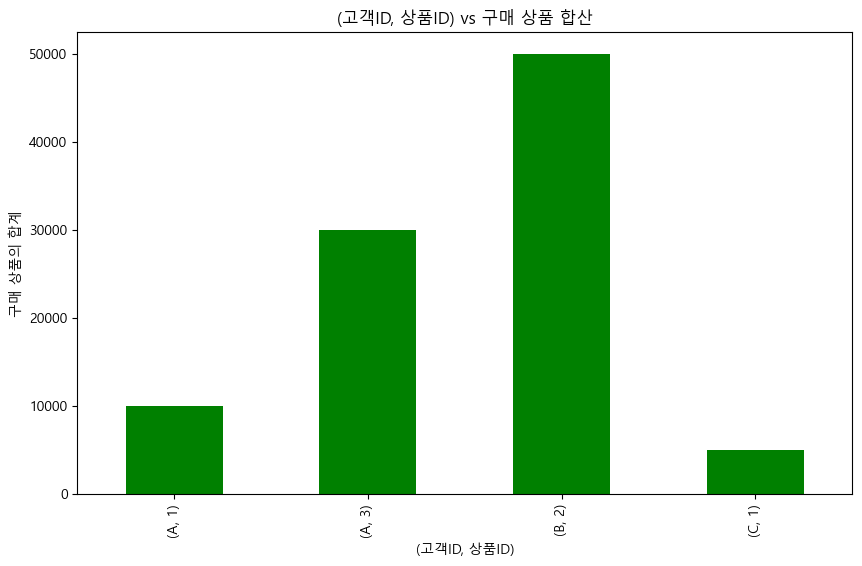

In [118]:
# 6) 고객ID와 상품ID를 기준으로 그룹화하여 구매금액의 합계를 계산하고, 막대그래프로 시각화(hint : groupby())
grouped_df = df.groupby(["고객ID", "상품ID"])["구매금액"].sum()
print(grouped_df)

grouped_df.plot(kind = "bar", color = "green")

plt.xlabel("(고객ID, 상품ID)")
plt.ylabel("구매 상품의 합계")
plt.title("(고객ID, 상품ID) vs 구매 상품 합산")
plt.show()


# 8장 다중색인(mutiIndex)
* 다중색인(multi-index)은 데이터프레임이나 시리즈의 인덱스를 여러 열로 구성하는 것
* 다중색인 사용
  * 데이터를 여러 기준으로 그룹화
  * 데이터를 여러 기준으로 검색

In [ ]:
# ex
# 1. 다중색인 생성

# 1) 데이터프레임 생성
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
print(df)
print(df.index)

# 2) 다중 색인으로 사용할 튜플 리스트
index = [('X', 1), ('X', 2), ('Y', 1)]

# 3) 다중색인 설정
df.index = pd.MultiIndex.from_tuples(index)

# 4) 색인 확인
print(df.index)
print(df)

#2.다중색인 사용
#1) 데이터프레임을 인덱스의 첫 번째 레벨로 그룹화하기
grouped = df.groupby(level = 0)

# 2)각 그룹의 평균을 구하기
grouped.mean()

In [ ]:
# ex
# 1. 다중 색인 생성(2)
df = pd.DataFrame({
    "data": [1, 2, 3, 4],
    "index1": ["A", "A", "B", "B"],
    "index2": [1, 2, 1, 2],
})
print(df)
print()

df = df.set_index(["index1", "index2"])
print(df)
print()

# 2.다중 색인 사용
grouped = df.groupby(level=0).mean()
grouped

In [ ]:
# 데이터셋 슬라이싱 :
print(df)
print()
df.loc["A", 1] # 레벨 1에서 "A" 선택, 레벨 2에서 1 선택

df.loc["B", :] # 레벨 1에서 "B" 선택, 레벨 2에서 모든 값 선택

df.loc[[('A', 2),('B',2)]] # 레벨 1에서 "A"와 "B" 선택, 레벨 2에서 1 선택

### [문제]: 다음 DataFrame에서 고객ID와 상품ID를 기준으로 다중색인을 만들고, 각 그룹의 구매금액의 합계를 계산하세요.

In [ ]:
# 데이터셋
data = [
  {"고객ID": "A", "상품ID": "1", "구매금액": 10000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 20000},
  {"고객ID": "C", "상품ID": "1", "구매금액": 5000},
  {"고객ID": "A", "상품ID": "3", "구매금액": 30000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 15000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 15000}
]

# 1. 데이터프레임 생성
df = pd.DataFrame(data)
print(df)
print()
# 2. 고객ID와 상품ID을 기준으로 다중색인을 생성하여 주어진 데이터프레임을 그룹하기
df =df.set_index(['고객ID', '상품ID'])
print(df)
print()
#3. 데이터프레임의 다중색인을 출력하기
df.index

In [ ]:
# 4. 고객을 기준으로 묶어서 구매금액의 합을 계산하시오.


# 5. 상품을 기준으로 묶어서 구매금액의 합을 계산하시오.

# 6. 결과를 출력하시오.


# 9.2장. plotting with pandas and seaborn


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import  numpy as np

* Bar Plots (막대그래프)
  * 범주형 데이터의 빈도, 비율을 시각화하는데 효과적
  * 빈도 분포 표시
  * 비율, 백분율 표시
  * 시계열 데이터 표시
  * 다중 변수의 비교


In [ ]:
# ex
#1. DataSet
df = pd.DataFrame(np.random.uniform(size=(6,4)),
                  index = ["one", "two", "three", "four", "five", "six"],
                  columns = ["A","B", "C", "D"])
print(df)

df.plot.bar()

In [ ]:
# ex
# 1. Dataset
# 가상의 데이터 (날짜, 파티 규모, 데이터 포인트 수)
data = {
    'Date': ['2024-04-27', '2024-04-27', '2024-04-27', '2024-04-27',
             '2024-04-28', '2024-04-28', '2024-04-28', '2024-04-28',
             '2024-04-29', '2024-04-29', '2024-04-29', '2024-04-29'],
    'Party Size': ['1', '2', '3', '4', '1', '2', '3', '4', '1', '2', '3', '4'],
    'Data Points': [20, 15, 10, 5, 18, 12, 8, 6, 25, 20, 15, 10]
}

# 2. DataFrame 생성
df = pd.DataFrame(data)
# 3. 데이터프레임을 피벗하여 각 파티 규모별 데이터를 준비
pivot_df = df.pivot(index='Date', columns='Party Size', values='Data Points')
# 4.막대 그래프 그리기
pivot_df.plot.bar(stacked=False, figsize=(10, 6))
# 5. 그래프의 속성 추가
plt.xlabel("Date")
plt.ylabel('Data Points')
plt.title("Date vs. Party Size vs. Data poins")
plt.legend(title= 'Party Size')
plt.show()

In [ ]:
#ex : 범주형 데이터의 그래프 그리기
# 1.  가상의 데이터의 데이터프레임
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male'],
    'Age Group': ['Adult', 'Adult', 'Child', 'Adult', 'Child', 'Child', 'Adult', 'Adult']
}

df = pd.DataFrame(data)
df.head()

#2. 교차표 생성
cross_tab = pd.crosstab(df['Gender'], df['Age Group'])
cross_tab 

#막대 그래프 그리기
cross_tab.plot.bar()
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Frequency of Age Groups by Gender')
plt.legend(title='Age Group')
plt.show()

## [예제]
* 'day'별에 따라 'size' 인원별 팁의 백분율을 보여주는 쌓인 막대 그래프를 그리기

In [ ]:
# 1. Dataset불러오기
tips = pd.read_csv('examples/tips.csv')

# 2. 빈도수 표 만들기
party_counts = pd.crosstab(tips["day"], tips['size'])
# print(party_counts)

#3. 인덱스 재설정
party_counts = party_counts.reindex(index = ["Thur","Fri","Sat","Sun"])
# print(party_counts)

## 3. 필터링
party_counts = party_counts.loc[:,2:5]
print(party_counts)
print()
# 4. 데이터 정규화 또는 비율로 계산
party_pcts = party_counts.div(party_counts.sum(axis = "columns"),
                              axis = "index")
print(party_pcts)

# # 5. 막대그래프로 그리기
party_pcts.plot.bar(stacked=True)
plt.xlabel('Day')
plt.ylabel('Ratio')
plt.title('Frequency of Size by Day')
plt.legend(title='tips')
plt.show()

In [ ]:
import seaborn as sns
tips["tip_pct"] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

sns.barplot(x = "tip_pct", y='day', data=tips, orient='h', hue='time')

# # 빅데이터 분석에 필요한 pandas의 데이터프레임의 핵심 기능
  * 데이터프레임 생성: pd.DataFrame() 함수를 사용하여 데이터프레임을 생성
  * 데이터프레임 인덱싱: loc 및 iloc 인덱서를 사용하여 데이터프레임의 특정 행과 열을 선택
  * 데이터프레임 슬라이싱: 슬라이싱 연산자를 사용하여 데이터프레임의 부분을 선택
  * 데이터프레임 필터링: 불리언 마스크를 사용하여 데이터프레임의 행과 열을 필터링
  * 데이터프레임 정렬: sort_values() 메서드를 사용하여 데이터프레임을 열 또는 인덱스별로 정렬
  * 데이터프레임 집계: groupby() 메서드를 사용하여 데이터프레임을 그룹화하고 집계 연산을 수행
  * 데이터프레임 결측치 처리: fillna() 메서드를 사용하여 데이터프레임의 결측치를 채우기
  * 데이터프레임 결합: merge() 메서드나 concat() 메서드를 사용하여 여러 데이터프레임을 결합하기

## [문제] 다음 주어진 데이터셋에서 다음 작업을 수행하시오.
  * 나이가 30세 이상인 사람들의 이름을 출력하기
  * 도시가 'New York' 또는 'Los Angeles'인 사람들의 나이의 평균을 출력하기
  * 이름이 'Bob'인 사람의 도시를 출력하기

In [ ]:
# dataset
data = {
    'Name': ['John', 'Mary', 'Bob', 'Alice', 'Tom'],
    'Age': [20, 25, 30, 35, 40],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Dallas']
}

In [ ]:
# 1. 나이가 30세 이상인 사람들의 이름 출력하기



In [ ]:
# 2. 도시가 'New York' 또는 'Los Angeles'인 사람들의 나이의 평균을 출력하기



In [ ]:
# 3. 이름이 'Bob'인 사람의 도시를 출력하기



# 10장 데이터 집계와 그룹 연산
* 하나 이상의 키(함수, 배열, 데이터프레임의 열 이름)를 이용해서 판다스 객체를 여러 조각으로 나누는 방법
* 합계, 평균, 표준편차, 사용자 정의 함수 같은 그룹 요약 통계를 계산하는 방법
* 정규화, 선형 회귀, 순위 또는 부분집합 선택 같은 그룹 내 변형이나 다른 조작을 적용하는 방법




* groupby() 연산에 대한 원리- apply()
    * 분리-적용-결합(split-apply-combine)
    * Aggregations refer to any data transformation that produces scalar values from arrays. 

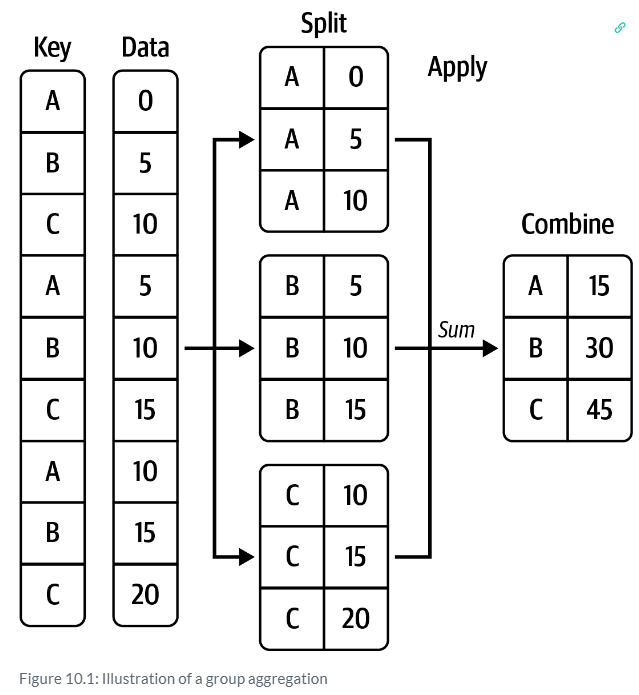

### [예제] 주어진 데이터를 key1으로 묶고 각 그룹에서 data1의 평균을 구하기

In [ ]:
# 데이터셋
dataset = {"key1" : ["a", "a", None, "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, None, 1],
                                      dtype="Int64"),
                   "data1" : np.random.standard_normal(7),
                   "data2" : np.random.standard_normal(7)}
df = pd.DataFrame(dataset)
df

In [ ]:
# mean() - 주어진 데이터을 컬럼을 사용하여 각 그룹으로 묶어 평균 집계 
# groupby().mean()
## 그룹 색인에서 누락된 값은 기본적으로 결과에서 제외됨

df.groupby("key1").mean()

df.groupby("key2").mean(numeric_only=True) # key1열이 결과에서 빠짐: df['key1']은 숫자 데이터가 아님

df.groupby(["key1", "key2"]).mean()

df.groupby(["key1", "key2"])[["data1"]].mean()

## 예제: 10.2.1 열에 여러 가지 함수 적용하기
* Column-Wise and Multiple Function Application


In [ ]:
# 데이터셋 가져오기
tips = pd.read_csv("examples/tips.csv")
tips.head()

In [ ]:
# total_bill에서 팁의 비율을 tip_pct 열에 출가하기
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
tips.head()

* agg()
  * 데이터프레임의 모든 열을 집계하려면 mean이나 std 같은 메서드를 호출하거나 agg를 통해 원하는 함수를 사용
  * 열에 따라 다른 함수를 사용해서 집계를 수행하거나 여러 개의 함수를 한 번에 적용하기

In [ ]:
# ex1
grouped = tips.groupby(["day", "smoker"])
grouped_pct = grouped["tip_pct"]
grouped_pct.agg("mean") # 기술 통계에서는 함수 이름을 문자열로 넘기기

In [ ]:
tips.groupby(["day", "smoker"])["tip_pct"].agg("mean")

In [ ]:
# ex2
grouped_pct.agg(["mean", "std"])  #함수 이름을 열 이름으로 하는 데이터프레임을 얻는다.

In [ ]:
# ex3 데이터프레임은 열마다 다른 함수를 적용하거나 여러 개의 함수를 모든 열에 적용하기
functions = ["mean", "max"]
result = grouped[["tip_pct", "total_bill"]].agg(functions)  # 데이터프레임은 계층적인 열로 구성
result

In [ ]:
# 각 열을 따로 계산한 다음 concat 메서드를 이용해 keys 인수로 열 이름을 넘긴 후 이어 붙인 것과 동일
result_conc = pd.concat([result['tip_pct'], result['total_bill']], axis='columns')
result_conc

## # 10.2.2 색인되지 않은 형태로 집계된 데이터 반환하기
* 집계된 데이터는 유일한 그룹 키 조합으로 (어떤 경우에는 계층적 색인)되어 반환되었다.
* groupby메서드에 as_index=False를 넘겨서 색인 작업을 비활성화

In [ ]:
# grouped = tips.groupby(["day", "smoker"], as_index=False)
# grouped.mean(numeric_only=True)

tips.groupby(["day", "smoker"], as_index=True).mean(numeric_only=True)

## # 10.3 apply 메서드 : 일반적인 분리-적용-병합
* apply() 메서드는 groupby 메서드의 가장 일반적인 메서드
* apply 메서드는 객체를 여러 조각으로 나누고, 전달된 함수를 각 조각에 일괄적으로 적용한 후 이를 다시 합친다.

In [ ]:
# 특정 열에서 가장 큰 값을 갖는 행을 선택하는 함수 정의
def top(df, n=5, column="tip_pct"):
    return df.sort_values(column, ascending=False)[:n]
    
top(tips, n=3,column="tip_pct")

In [ ]:
tips.groupby(["smoker", "day"]).apply(top, n=1, column="total_bill")

In [ ]:
result = tips.groupby("smoker")["tip_pct"].describe()
result

In [ ]:
result.unstack("smoker")


## [문제] 
* 고객ID와 상품ID를 기준으로 그룹화하여 구매금액의 평균을 계산하고, 그 결과를 상품ID순으로 출력하세요.

In [ ]:
df = pd.DataFrame({
    "고객ID": [1, 2, 1, 3, 2, 3],
    "상품ID": [101, 102, 103, 101, 103, 102],
    "구매금액": [10000, 20000, 30000, 40000, 50000, 60000]
})

# 고객ID와 상품ID을 기준으로 그룹화하여 구매금액의 평균을 계산
average_spent_by_customer_product = df.groupby(["고객ID", "상품ID"])["구매금액"].mean()

# 상품ID을 기준으로 정렬하기
average_spent_by_customer_product = average_spent_by_customer_product.sort_index(level = "상품ID")
print(average_spent_by_customer_product)

# 막대그래프로 시각화하기
average_spent_by_customer_product.plot.bar()


# 그래프 부가 정보 추가하기
plt.title("Average Purchase Amount by Product ID")
plt.xlabel("Product ID")
plt.ylabel("Average Purchase Amount")
plt.show()